# convolutional neural network для класифікації раку шкіри

### Імпорт усіх необхідних бібліотек

In [2]:
#Встановлення необхідних пакетів
%pip install pandas pillow matplotlib seaborn

     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.7 MB 1.3 MB/s eta 0:00:09
     ---------------------------------------- 0.1/10.7 MB 1.4 MB/s eta 0:00:08
     - -------------------------------------- 0.3/10.7 MB 2.1 MB/s eta 0:00:05
     - -------------------------------------- 0.4/10.7 MB 2.5 MB/s eta 0:00:05
     --- ------------------------------------ 0.8/10.7 MB 3.6 MB/s eta 0:00:03
     --- ------------------------------------ 0.9/10.7 MB 4.0 MB/s eta 0:00:03
     ------ --------------------------------- 1.7/10.7 MB 5.3 MB/s eta 0:00:02
     ------ --------------------------------- 1.9/10.7 MB 5.9 MB/s eta 0:00:02
     ---------- ----------------------------- 2.7/10.7 MB 6.7 MB/s eta 0:00:02
     ------------ --------------------------- 3.2/10.7 MB 7.1 MB/s eta 0:00:02
     ------------- -------------------------- 3.6/10.7 MB 7.3 MB/s eta 0:00:01
     --------------- ------------------------ 4.1/10.7 MB 7


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\olegw\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pathlib
import os
import PIL
import tensorflow as tf #основна платформа тренування нейронної мережі
#mport keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import numpy as np # для лінійної алгебри 
import pandas as pd # для обробки csv файлів
import matplotlib.pyplot as plt #для побудови графиків
import seaborn as sns #для побудови графиків
%matplotlib inline

from glob import glob

# приховування попереджень
import warnings
warnings.filterwarnings('ignore')

# висталвення опцій
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Завантаження та читання даних

In [3]:

# Перевірка наявності вхідних даних у директорії "../input/" 

import os
for dirname, _, filenames in os.walk('/images/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        pass
        

#### Шляхи для тренувальних та тестових зображень

In [4]:
# Визначення шляхів
data_dir_train = pathlib.Path('images/input/Cancer CNN Training Materials/Train/')
data_dir_test = pathlib.Path('images/input/Cancer CNN Training Materials/Test/')

In [5]:
print(os.listdir('images/input/Cancer CNN Training Materials/Train/'))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### Перевірка кількості тренувальних зображень

In [6]:
training_image_count = len(list(data_dir_train.glob('*/*.jpg')))
print(training_image_count)
testing_image_count = len(list(data_dir_test.glob('*/*.jpg')))
print(testing_image_count)

2239
118


#### Список шляхів усіх тренувальних зображень, необхідний щоб наповнити dataframe

In [7]:
# отримання точних шляхів для кожного зображення в папці train
image_paths_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(image_paths_list)

['images\\input\\Cancer CNN Training Materials\\Train\\actinic keratosis\\ISIC_0025780.jpg', 'images\\input\\Cancer CNN Training Materials\\Train\\actinic keratosis\\ISIC_0025803.jpg', 'images\\input\\Cancer CNN Training Materials\\Train\\actinic keratosis\\ISIC_0025825.jpg', 'images\\input\\Cancer CNN Training Materials\\Train\\actinic keratosis\\ISIC_0025953.jpg', 'images\\input\\Cancer CNN Training Materials\\Train\\actinic keratosis\\ISIC_0025957.jpg', 'images\\input\\Cancer CNN Training Materials\\Train\\actinic keratosis\\ISIC_0025992.jpg', 'images\\input\\Cancer CNN Training Materials\\Train\\actinic keratosis\\ISIC_0026040.jpg', 'images\\input\\Cancer CNN Training Materials\\Train\\actinic keratosis\\ISIC_0026149.jpg', 'images\\input\\Cancer CNN Training Materials\\Train\\actinic keratosis\\ISIC_0026171.jpg', 'images\\input\\Cancer CNN Training Materials\\Train\\actinic keratosis\\ISIC_0026194.jpg', 'images\\input\\Cancer CNN Training Materials\\Train\\actinic keratosis\\ISIC_0

#### Список класів раку шкіри

In [8]:
# Отримання назв класів за назвою кожної папки тренувальних даних
lesion_type_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train,'*', '*.jpg'))]
print(lesion_type_list)

['actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic ker

In [9]:
# Створення словника для підготовки dataframe
dataframe_dict = dict(zip(image_paths_list, lesion_type_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [10]:
original_df.head()

,Path,Label
0,images\input\Cancer CNN Training Materials\Tra...,actinic keratosis
1,images\input\Cancer CNN Training Materials\Tra...,actinic keratosis
2,images\input\Cancer CNN Training Materials\Tra...,actinic keratosis
3,images\input\Cancer CNN Training Materials\Tra...,actinic keratosis
4,images\input\Cancer CNN Training Materials\Tra...,actinic keratosis


In [11]:
original_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

### Завантаження через keras.preprocessing

Вивантаження зображень з диску через утиліту image_dataset_from_directory.

### Створення dataset

Параметри завантажувача (loader):

In [12]:
#Параметри завантажувача (loader):
batch_size = 32
img_height = 200
img_width = 200

Для оптимального розподілу, використовується 80% зображень для тренування, 20% для валідації.

### Тренувальний датасет

In [13]:
## отримання тренувального датасету за допомогою бібліотеки keras, seed = 123, на валідацію виділяється = 20%, зображення зменшуються до 180x180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels='inferred',
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8539 files belonging to 9 classes.
Using 6832 files for training.


### Валідаційний датасет

In [14]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels='inferred',
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 8539 files belonging to 9 classes.
Using 1707 files for validation.


In [15]:
# Вивід списку усіх класів 
# Беруться з імен папок в алфавітному порядку.
class_names = train_ds.class_names
print(class_names)
print(val_ds.class_names)
num_classes = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Візуалізація даних
#### Візуалізація по одному екземпляру з кожного класу

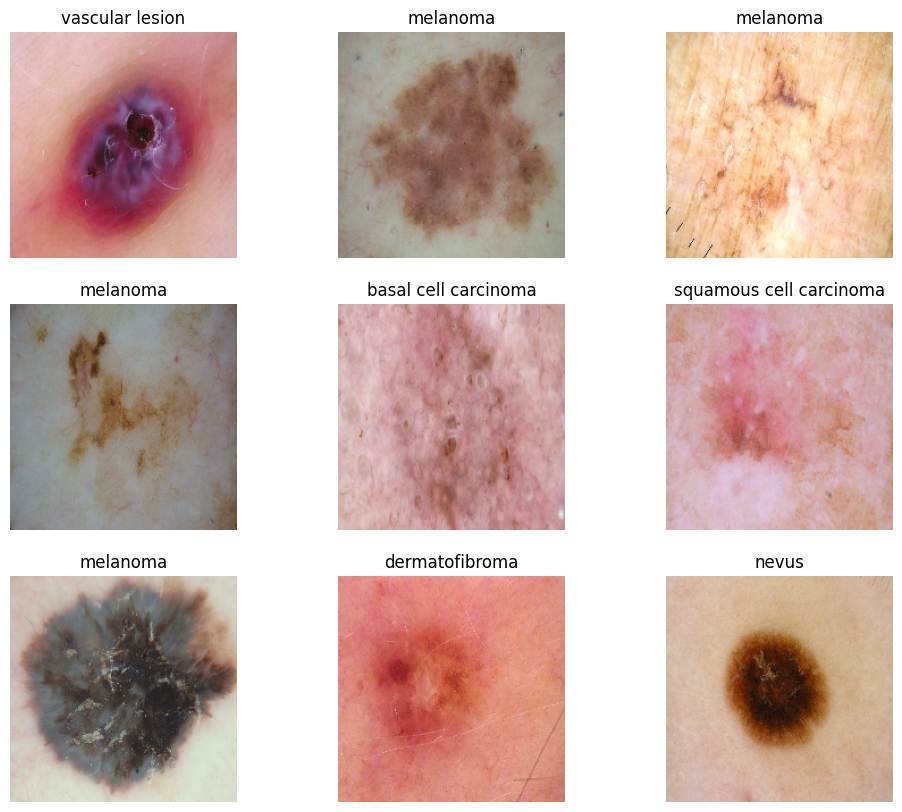

In [99]:
# Створення діаграми за 9 класами
plt.figure(figsize=(12, 10))
for images, labels in train_ds.take(1):
    for i in range(num_classes):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


`image_batch` це тензор форми `(32, 180, 180, 3)`. Тобто, набір з 32 зображень у формі `200x200x3` (останнє число - канали RGB).

`label_batch` це тензор форми `(32,)` з назвами для попередніх 32 зображень.

`Dataset.cache()` зберігає зображення в пам'яті, після того як вони вивантажуються з диску на першій епосі.

`Dataset.prefetch()` data preprocessing і model execution під час тренування.

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Модель 1 : Проста модель

### Створення моделі
#### Створення згорткової нейронної мережі, яка розрізняє та класифікує 9 класів з датасету. Функція ```layers.experimental.preprocessing.Rescaling``` нормалізує значення пікселів між (0,1), бо значення RGB каналів зазвичай зберігаються у форматі `[0, 255]`.

### Корекція даних 

In [25]:
# Для боротьби з overfitting, можна використати наступні методи доповнення даних: 
# - Випадкове віддзеркалення
# - Випадковий поворот
# - Випадковий зум

# Цей шар корекції даних допоможе моделі менше фокусуватись на одному конкретному прикладі з тренувальних даних

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1)
])


### Візуалізація корегованих даних

In [26]:
#Наочна демонстрація того, що робиться з тренувальними зображеннями.
plt.figure(figsize=(12, 10))
for images, labels in train_ds.take(1):
    for i in range(num_classes):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")
plt.show()

## Модель 2 з додатковими шаром корегування

In [27]:
%pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


In [28]:
path_to_training_dataset='images/input/Cancer CNN Training Materials/Train/'
import Augmentor



In [29]:
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=20, max_right_rotation=20)
    p.sample(700)

In [30]:


training_image_count = len(list(data_dir_train.glob('*/output/*.jpg')))
print(training_image_count)



6300


In [17]:
image_paths_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_type_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# створення нових датасетів з аугментованими даними
dataframe_dict_new = dict(zip(image_paths_list_new, lesion_type_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
new_df = pd.concat([original_df, df2], ignore_index=True)

In [32]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    1162
melanoma                      1138
basal cell carcinoma          1076
nevus                         1057
squamous cell carcinoma        881
vascular lesion                839
actinic keratosis              814
dermatofibroma                 795
seborrheic keratosis           777
Name: count, dtype: int64

### Визначення шарів моделі

In [16]:

model = Sequential([
     # шар зміни розміру зображень
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    # згортковий шар №1
  layers.Conv2D(16, 3, padding='same', activation='relu'),
    # Шар проведення операції maxpooling (дискретизація значень, розбиття на суб-регіони)
  layers.MaxPooling2D(),
    # шар рандомізації вхідної інформації
  layers.Dropout(0.25),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
    
  layers.MaxPooling2D(),
    
  layers.Dropout(0.25),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
    
  layers.MaxPooling2D(),
    
  layers.Dropout(0.25),
    # шар переведення даних в одну площину
  layers.Flatten(),
    # 1й щільний шар
  layers.Dense(128, activation='relu'),
    # шар виходу з функцією активації softmax
  layers.Dense(num_classes,activation='softmax')
])

### Компіляція моделі

In [52]:
## Компіляція з оптимізатором adam та функцією втрат sparse_categorical_crossentropy 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Сумарна інформація про модель

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                    

### Тренування моделі

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

### Візуалізація результатів

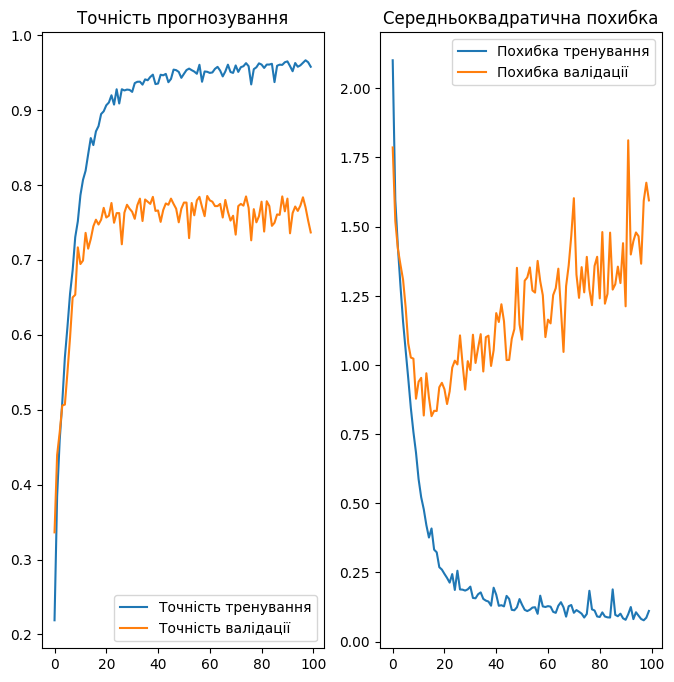

In [95]:
#візуалізація результатів
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точність тренування')
plt.plot(epochs_range, val_acc, label='Точність валідації')
plt.legend(loc='lower right')
plt.title('Точність прогнозування')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Похибка тренування')
plt.plot(epochs_range, val_loss, label='Похибка валідації')
plt.legend(loc='upper right')
plt.title('Середньоквадратична похибка')
plt.show()

## Висновки

### Побудова графіку для аналізу дизбалансу класів

In [72]:
# створення словника з тренувальних даних для побудови діаграми
image_dict = {}
for classname in class_names:
    image_dict[classname] = len(list(data_dir_train.glob(classname+'/*.jpg')))   
print(image_dict)  

{'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}


In [73]:
df = pd.DataFrame()
counts = list(image_dict.values())
df['class'] = class_names
df['count'] = counts

In [74]:
df.head(10)

,class,count
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


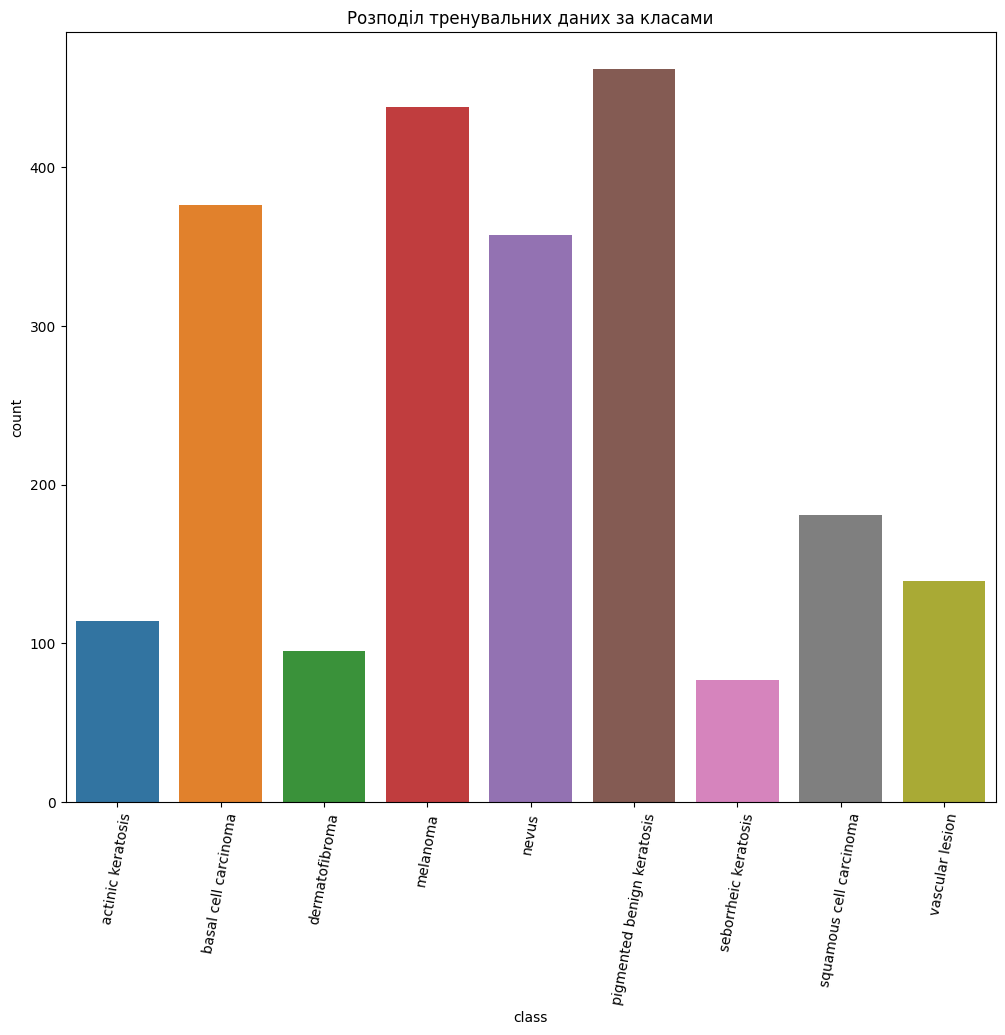

In [97]:
# Створення діаграми за класами
plt.figure(figsize=(12, 10))
sns.barplot(x = df['class'], y = df['count'], data = df)
plt.xticks(rotation=80)
plt.title('Розподіл тренувальних даних за класами')
plt.show()

## Збереження моделі
Отримана модель зберігається у формат Tensorflow Lite для подальшого прикріплення до Android-застосунку

In [76]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\olegw\AppData\Local\Temp\tmp1e7o9rgh\assets


## Тестування прогнозів


In [120]:
PATH_SAVED_MODEL = "saved_models/Test1"
model.save(PATH_SAVED_MODEL)

INFO:tensorflow:Assets written to: saved_models/Test1\assets


INFO:tensorflow:Assets written to: saved_models/Test1\assets


In [64]:
testing_batch_size = 15

data_dir_new = pathlib.Path('images\clean\Test')
new_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_new,
  labels='inferred',
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=testing_batch_size)

Found 118 files belonging to 9 classes.
Using 95 files for training.


In [65]:
PATH_SAVED_MODEL = "saved_models/Test1"
loaded_model = tf.keras.models.load_model(PATH_SAVED_MODEL)
image_batch, label_batch = new_ds.as_numpy_iterator().next()

In [68]:
predictions = loaded_model.predict(image_batch,batch_size=testing_batch_size)

predictions = tf.nn.softmax(predictions)

predicted_label = tf.argmax(input=predictions, axis=1)
predicted_label_confidence = np.amax(predictions, axis=1)
predicted_label = predicted_label[0:testing_batch_size]
predicted_label_confidence = predicted_label_confidence[0:testing_batch_size]

1/1 [==============================] - 0s 39ms/step


In [69]:
fp = tf.keras.metrics.FalsePositives()
fp.update_state(label_batch, predicted_label)
fp = fp.result().numpy()
print("False positives: ",fp)
fn = tf.keras.metrics.FalseNegatives()
fn.update_state(label_batch, predicted_label)
fn = fn.result().numpy()
print("False negatives: ",fn)
tn = tf.keras.metrics.TrueNegatives()
tn.update_state(label_batch, predicted_label)
tn = tn.result().numpy()
print("True positives: ",tn)
# Find false positive rate.
fpr = fp / (fp + tn)

print("False positive rate: ", fpr)

False positives:  2.0
False negatives:  0.0
True positives:  0.0
False positive rate:  1.0


### Візуалізація прогнозу

In [77]:
print('Predictions:\n', predicted_label.numpy())
print('Confidence:\n', predicted_label_confidence)
print('True values:\n', label_batch)

for i in range(len(predicted_label)):
    if predicted_label[i]!=label_batch[i]:
        print("misclassified ", label_batch[i]+1, " as ", predicted_label[i].numpy()+1, " with confidence of ", predicted_label_confidence[i])

Predictions:
 [8 4 1 7 1 3 4 4 4 3 4 5 1 1 4]
Confidence:
 [0.2536117  0.2536117  0.2406481  0.2411604  0.24631332 0.25359362
 0.25357172 0.25317854 0.2536117  0.17775689 0.2523626  0.23548234
 0.25359786 0.25276145 0.2505911 ]
True values:
 [8 3 2 7 1 2 4 4 3 4 0 5 1 5 0]
misclassified  4  as  5  with confidence of  0.2536117
misclassified  3  as  2  with confidence of  0.2406481
misclassified  3  as  4  with confidence of  0.25359362
misclassified  4  as  5  with confidence of  0.2536117
misclassified  5  as  4  with confidence of  0.17775689
misclassified  1  as  5  with confidence of  0.2523626
misclassified  6  as  2  with confidence of  0.25276145
misclassified  1  as  5  with confidence of  0.2505911


Predictions:
 [8 4 1 7 1 3 4 4 4 3 4 5 1 1 4]
True values:
 [8 3 2 7 1 2 4 4 3 4 0 5 1 5 0]


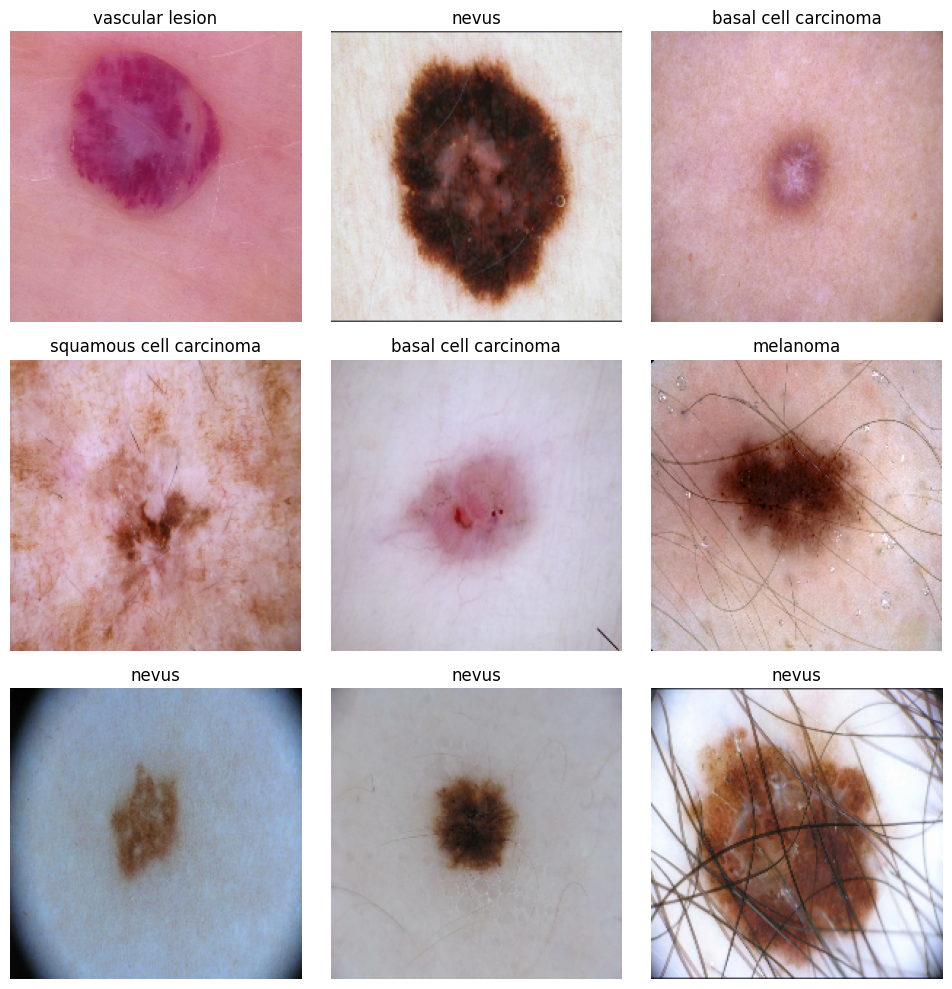

In [61]:


plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predicted_label[i]])
  plt.axis("off")
